### Bibliotecas necessárias

In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

## Pré-processamento das imagens

In [3]:
# Modelo / paramêtros dos dados
num_classes = 10
input_shape = (28, 28, 1)

# Downlaod dos dados e divição em conjuntos de treinamento e teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Dimensione imagens para o intervalo [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Certifique-se de que as imagens tenham formato (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# converter vetores de classe em matrizes de classe binárias
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Vendo as imagens

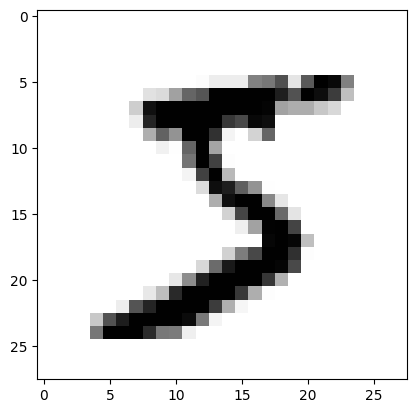

In [4]:
# Visualizar uma imagem e seu tamanho através dos eixos
plt.imshow(x_train[0], cmap=plt.cm.binary)

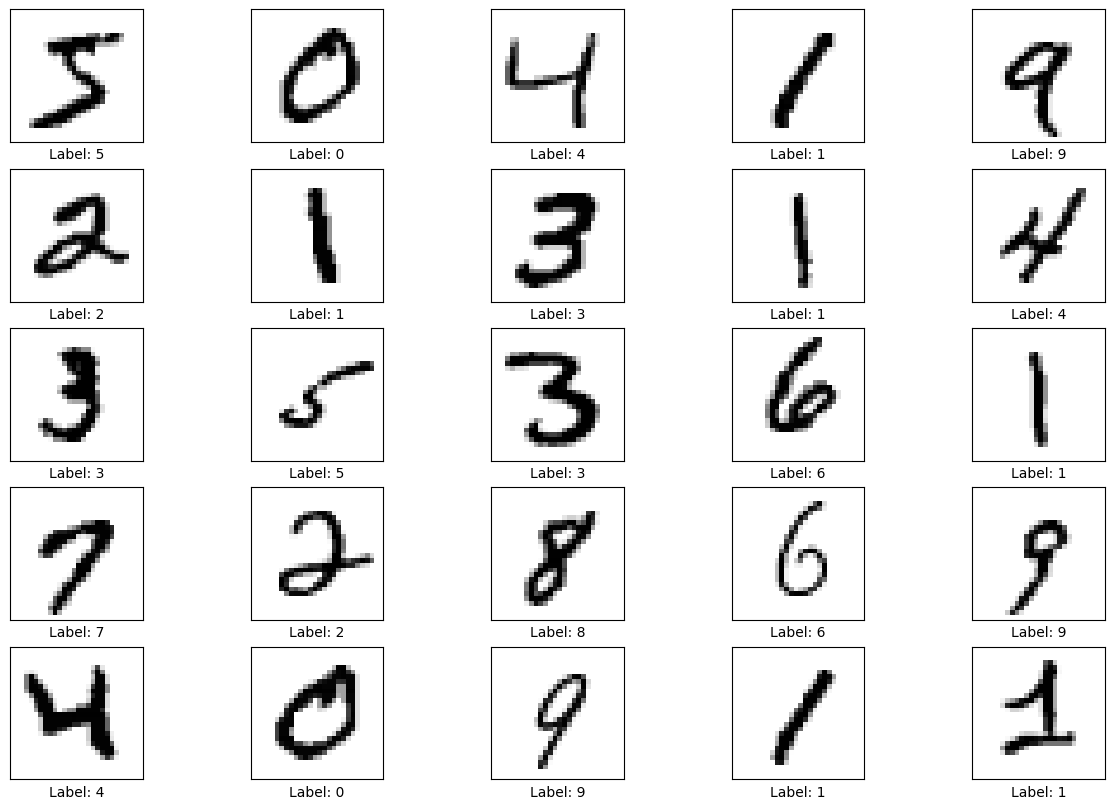

In [5]:
# Visualizar 10 imagens e seus rótulos
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(f'Rótulo: {np.argmax(y_train[i])}')
plt.show()

## Modelo -  Rede Neural Convolucional (CNN)

Author: fchollet

Date created: 2015/06/19 

Last modified: 2020/04/21


Description: A simple convnet that achieves ~99% test accuracy on MNIST.



### Definindo as camadas da CNN

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

### Definindo um *callback* para interromper o treinamento (incorporei um escore alto pois no código do Chollet já era mencionado que a CNN tinha uma acurácia de 99%), função de perda, otimizador e a matrica de avaliação.

In [7]:
batch_size = 128
epochs = 15

# Callback para interromper o treinamento se a acurácia atingir 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


# Adicionar paramêtros (loss function, otimizador e métrica de avaliação)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Treinamento do modelo

In [27]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[callbacks], validation_split=0.1, verbose=2)

Epoch 1/15

Reached 90% accuracy so cancelling training!
422/422 - 5s - 13ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9908 - val_loss: 0.0321


## Avaliação do modelo treinado

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", round(score[0], 2))
print("Test accuracy:", round(score[1], 2))

Test loss: 0.03
Test accuracy: 0.99


## Fazendo as predições com o modelo treinado

In [10]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#### Exemplo do índice 2

In [11]:
# lista com as probabilidades para cada classe [0-1]
np.array(predictions[2])

array([3.5812522e-07, 9.9980086e-01, 2.3836508e-06, 1.3840857e-08,
       1.1062459e-04, 5.9761607e-07, 8.4169500e-07, 7.3724128e-05,
       1.0268027e-05, 3.2870500e-07], dtype=float32)

Como podemos ver, a maior probabilidade encontra-se na posição 1 (i.e., 9.99), ou seja, valor 1.

In [22]:
print(f'A maior probabilidade está no índice', np.argmax(predictions[2]),'.')

A maior probabilidade está no índice 1 .


In [23]:
np.argmax(predictions[2])

1

### Vamos ver a imagem!

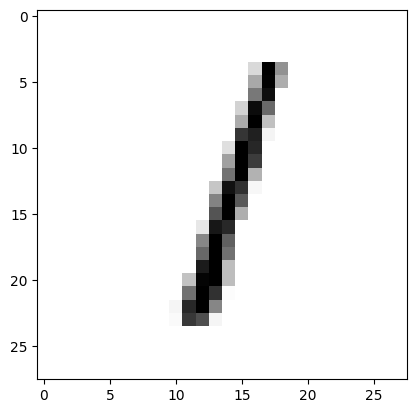

In [12]:
plt.figure()
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()

## Agora vamos plotar algumas figuras com seus respectivos rótulos preditos.

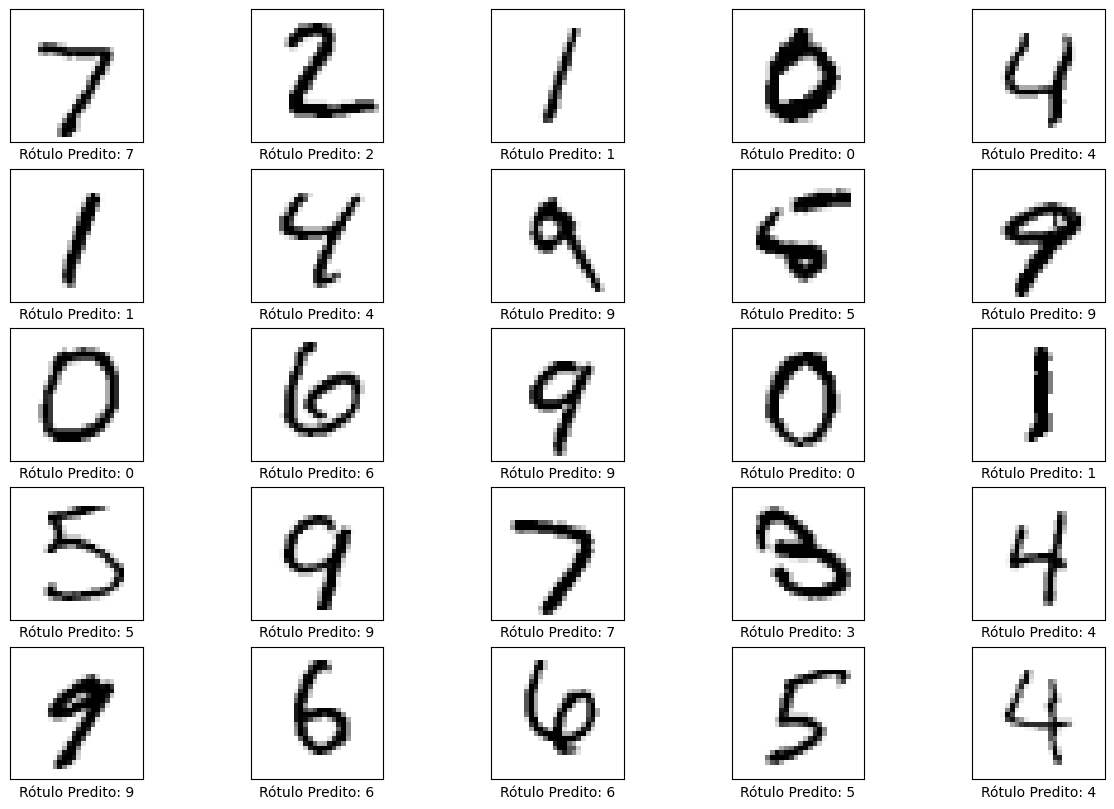

In [13]:
# Visualizar 10 imagens 
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(f'Rótulo Predito: {np.argmax(predictions[i])}')
plt.show()

### Reference
[Chollet, F. A simple convnet that achieves ~99% test accuracy on MNIST.](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/mnist_convnet.ipynb#scrollTo=xo9HwpE5gmQB)